# Qiskit Fall Fest 2023

![QFF Logo](images/QFF-logo.png)

## Challenge 7: Grover's algorithm

양자 컴퓨터가 고전 컴퓨터에 비해 가진 많은 장점 중 하나는 데이터베이스 검색 속도가 빠르다는 것입니다. 이와 관련된 것이 **Grover's algorithm**입니다. 이 알고리즘은 unstructured search problem을 고전적인 컴퓨터보다 시간 복잡도(시간 복잡도가 무엇인지 아래에서 설명드리겠습니다) 관점에서 quadratially 빠르게 풀 수 있습니다. unstructured search problem이란 특정한 자료 구조가 없는 날 것의 데이터에서 찾고자 하는 데이터를 찾아내는 것입니다. quadratically 빠르게 풀 수 있다는 Grover's algorithm의 시간 복잡도가 고전적인 알고리즘의 시간 복잡도의 제곱근이 된다는 것입니다.

### 시간 복잡도(Time complexity)

알고리즘을 실행 소요시간 측면에서 분석할 때 **시간 복잡도** 라는 개념을 사용합니다. 즉, 시간 복잡도로 알고리즘의 성능을 나타낼 수 있습니다. 알고리즘에서의 명령의 실행 빈도수를 계산하여 시간 복잡도를 구하게 됩니다.

이러한 시간 복잡도 표기 중 최악의 경우를 다루는 Big-O 표기법이 있습니다. Big-O 표기법은 해당 알고리즘의 수행 시간이 가장 오래 걸릴 때 얼마나 걸릴지 표기하는 방법입니다.

Big-O notation의 예시를 살펴보겠습니다.

1. $O(1)$

입력 데이터 크기에 상관없이 언제나 일정한 시간이 걸리는 알고리즘입니다.

In [1]:
def constant_time(n: list):
    return n[0]

# case 1
n1=[5,2,3,7,11,23,7,8,9]
print(constant_time(n1))

# case 2
n2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print(constant_time(n2))

5
1


위의 함수 `constant_time`은 리스트를 입력으로 받아서 해당 리스트의 가장 첫번째 원소를 출력하는 함수입니다. 이 함수의 입력으로 100개의 원소가 있는 리스트가 입력되든, 1억개의 원소가 있는 리스트가 입력되든 결과를 출력하는데 같은 시간이 걸립니다. 그 리스트의 첫번째 원소만 읽어서 출력하면 되는 것이므로 리스트의 크기에 영향을 받지 않기 때문입니다. 이렇게 입력 데이터의 크기에 영향을 받지 않는 알고리즘은 시간 복잡도가 **O(1)** 이라고 말합니다.

2. $O(n)$

입력 데이터의 크기에 비례해서 처리 시간이 걸리는 알고리즘입니다.

In [2]:
def linear_time(n):
    sum = 0
    for i in range(len(n)):
        sum = sum + n[i]
    print(sum)

# case 1
n1=[5,2,3,7,11,23,7,8,9]
linear_time(n1)

# case 2
n2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
linear_time(n2)

75
820


위의 함수 `linear_time`은 리스트의 모든 원소의 합을 출력합니다. 이 경우, 리스트의 앞에서부터 원소들을 하나씩 꺼내면서 덧셈을 진행하기 때문에 이 함수를 수행하는데 걸리는 시간은 입력 리스트 길이에 비례합니다. 이렇게 입력 데이터 크기와 알고리즘 수행 시간이 비례하는 경우 시간 복잡도가 **$O(n)$** 이라고 합니다.

3. $O(2^{n})$

입력 데이터의 크기가 커질수록 처리 시간이 지수적으로 늘어나는 알고리즘입니다. 입력 데이터가 조금만 커져도 알고리즘을 수행하는데 매우 오랜 시간 걸립니다. 대표적인 예시로 재귀함수를 이용하여 피보나치 수열을 구하는 알고리즘이 있습니다.

In [3]:
def fib(n):
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)

print(fib(1)) # 결과가 금방 나옵니다.

1


In [4]:
print(fib(5)) # 마찬가지로 결과가 금방 나옵니다.

5


In [5]:
print(fib(30)) # 시간이 약간 걸릴 수 있습니다

832040


In [6]:
print(fib(35)) # 시간이 꽤 걸립니다.

9227465


`fib(100)` 과 같은 것은 시도하지 않는 것이 좋습니다. 계산하는데 시간이 엄청 오래 걸릴 것이기 때문입니다!

## Part 1: Overview of Grover's algorithm

![picture1](images/challenge7_circuit1.png)

그림 출처: [Qiskit textbook](https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm)

구조가 없는(= 정돈되지 않은 = unstructured) $N$개의 데이터가 있는 리스트에서 보라색으로 마킹 되어 있는 것을 찾고 싶습니다. 고전적인 컴퓨터로는 리스트 원소를 하나씩 다 살펴보면서 우리가 찾고자 하는 데이터(마킹 되어 있는 데이터)와 같은지 비교하면서 찾아야 합니다. 평균적으로는 $N/2$번 정도 리스트 원소가 우리가 찾고자 하는 데이터와 같은지 확인하면 될 것입니다. 최악의 경우 $N$ 번 시도를 해야합니다. 즉, 고전적인 컴퓨터로 unstructured 데이터들에서 원하는 데이터를 찾는 알고리즘의 시간 복잡도가 $O(N)$ 이라는 것입니다.

하지만 양자 컴퓨터를 이용하여 Grover's algorithm을 수행하면 $\sqrt{N}$에 비례하는 횟수만큼 연산을 수행하면 됩니다. 따라서 unstructured search problem에 대해 양자 컴퓨터를 사용하면 고전 컴퓨터를 사용할 때보다 quadratically speed up 이 된다고 말하는 것입니다.

Grover's algorithm은 다음 3가지 과정으로 구성됩니다.

1. state preparation
2. Grover's oracle
3. diffusion operator

찾고자 하는 데이터가 있는 공간들을 양자 상태로 표현할 수 있습니다. 예를 들어 리스트의 첫번째를 $|00000\rangle$, 두번째를 $|00001\rangle$으로 표현할 수 있습니다. **State preparation** 단계에서는 이러한 모든 양자 상태를 중첩시키는 것입니다. 찾아야 하는 데이터 공간 전체를 중첩시키는 상태로 양자 상태를 준비하는 것입니다. **Oracle**은 찾고자 하는 데이터에 마킹을 하는 연산을 의미하고, **diffusion operator**는 마킹된 정답들이 관측될 확률을 높여주는 연산을 의미합니다.

![grover step](./images/grover_steps.png)

## Part 2: State preparation - Grover's algorithm

n개의 qubits가 있다면 총 $2^{n}$개의 데이터를 표현할 수 있습니다. 예를 들어 3개의 qubits가 있는 경우 $|000\rangle,\,|001\rangle,\,|010\rangle,\,|011\rangle,\,|100\rangle,\,|101\rangle,\,|110\rangle,\,|111\rangle$ 총 $2^{3} = 8$가지 경우의 수가 있습니다. 3 qubits의 경우 다음과 같은 상태가 모든 양자 상태를 중첩 시킨 상태입니다.

$$\frac{1}{2\sqrt{2}}[|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle]$$

이렇게 모든 양자 상태를 중첩시키려면 어떻게 해야할까요? 아시다시피 Qiskit에서 양자 회로는 모든 qubit들이 $|0\rangle$ 상태입니다. 이러한 모든 qubit에 hadamard gate를 가하면 어떻게 될까요? 아래의 식은 다들 아실 것입니다.

$$H|0\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\\ \end{bmatrix}\begin{bmatrix}1\\0\\ \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\\ \end{bmatrix} = \frac{1}{\sqrt{2}}[|0\rangle + |1\rangle]$$

3qubits에 각각 hadmard gate를 가하면 어떻게 되는지 아래의 수식을 보시길 바랍니다.

$$
\begin{aligned}
H^{\otimes3}|0\rangle^{\otimes3}
&= H|0\rangle H|0\rangle H|0\rangle\\
&= \frac{1}{2\sqrt{2}}(|0\rangle + |1\rangle)(|0\rangle + |1\rangle)(|0\rangle + |1\rangle)\\
&= \frac{1}{2\sqrt{2}}[|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle]
\end{aligned}
$$

3 qubits 예시를 보면 모든 qubit에 hadamard gate를 가하면 3 qubits가 가질 수 있는 모든 양자상태를 중첩시킨 상태가 나온다는 것을 알 수 있습니다. 이는 3 qubits일 때에만 해당하는 것이 아니라 일반적인 n qubits 일 때에도 성립합니다.

이렇게 가능한 n qubits의 computational basis 기반으로 모든 양자 상태를 모두 중첩시킨 양자 상태를 이번 챌린지에서는 $|s\rangle$ 이라고 정의합시다. 뒤에서 이 $|s\rangle$ 에 대한 언급이 계속해서 나올 것입니다!!

$$|s\rangle = H^{\otimes n}|0\rangle^{\otimes n}$$

이제 코딩을 하기 위해 필요한 패키지들을 import 하겠습니다.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer, transpile, qasm3
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_ibm_provider import least_busy, IBMProvider
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCMT

from qiskit.visualization import plot_histogram, array_to_latex

from qiskit_aer import AerSimulator, QasmSimulator

여러분은 이번 challenge에서 5 qubits에서의 Grover's algorithm을 구현하시게 될 것입니다. 5개의 qubits를 가진 빈 회로인 base 회로를 아래의 코드 셀에서 제공해드리겠습니다.

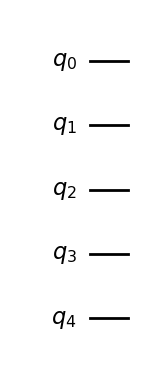

In [20]:
q = QuantumRegister(5, name = "q")
base = QuantumCircuit(q)
base.draw("mpl")

### 문제 1

아래의 코드 셀에서 `state_preparation` 함수를 작성하시길 바랍니다. 함수의 입력으로 들어온 QuantumCircuit의 5개의 qubit에 전부 hadamard gate를 가하는 함수를 만드시면 됩니다.

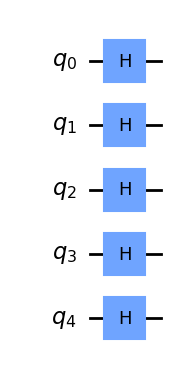

In [42]:
def state_preparation(circuit: QuantumCircuit) -> None:
    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    circuit.h([0,1,2,3,4])

    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
state_preparation(qc)
answer1 = qc
qc.draw('mpl', cregbundle=False)

In [43]:
# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge7a

grade_challenge7a(answer1)


Congratulations 🎉! Your answer is correct.


In [44]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

## Part 2: Creating the Oracle

Grover's algorithm의 두번째이자 가장 중요한 것은 oracle을 만드는 과정입니다. Oracle은 우리가 찾고자 하는 양자 상태의 위상만 음수로 바꾸어 주고 나머지 양자 상태는 그대로 두는 것입니다.

$$
U_{\omega} = \bigg\{\begin{matrix}
\;\;\,|x\rangle \quad if \quad x \neq \omega \\
-|x\rangle \quad if \quad x = \omega
\end{matrix}
$$

$|\omega\rangle = |11111\rangle$에 대해 oracle을 작성해보면 다음과 같습니다.

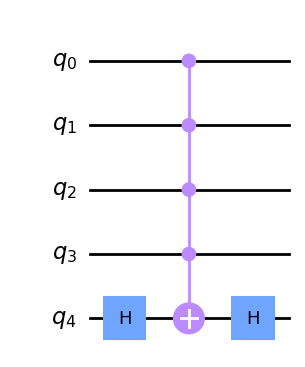

In [45]:
def cnz(n: int) -> QuantumCircuit:
    circuit = QuantumCircuit(n)
    circuit.h(n-1)
    circuit.mcx([i for i in range(n-1)], n-1)
    circuit.h(n-1)
    return circuit

cnz(5).draw("mpl")

위의 회로는 5개의 qubit 모두 $|1\rangle$ 일 때, 위상을 뒤집어주는 기능을 합니다. 이를 `c5z` gate라고 부르겠습니다.

다음은 두 개의 양자 회로를 합치는 방법을 가르쳐드리겠습니다. QuantumCircuit의 `compose()`메서드를 사용하시면 됩니다. 아래의 두 코드 셀은 그 예시입니다.

example 1


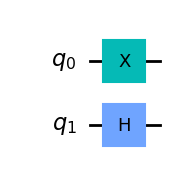

example 2


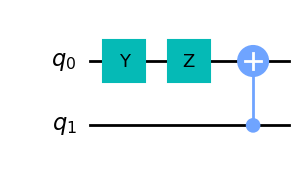

example1 = example1 + example2


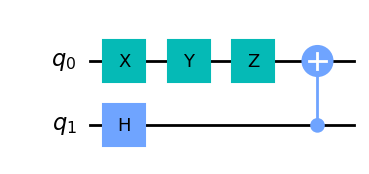

In [46]:
example1 = QuantumCircuit(2)
example1.x(0)
example1.h(1)
print("example 1")
display(example1.draw("mpl"))

example2 = QuantumCircuit(2)
example2.y(0)
example2.z(0)
example2.cx(1,0)
print("example 2")
display(example2.draw("mpl"))

# Add example2 circuit to example1 circuit
example1.compose(example2, inplace=True)
print("example1 = example1 + example2")
example1.draw('mpl')

### 문제 2

`oracle` 함수 내부에 $|\omega\rangle = |11010\rangle$에 대한 oracle 가능을 할 수 있는 양자 회로를 반환해주는 코드를 작성해주시길 바랍니다. $|\omega\rangle = |11010\rangle$에 대한 oracle은 다음과 같은 과정을 통해 작성하시면 됩니다.

1. `q2`와 `q0`에 X gate를 가합니다.
2. 5 qubits에 `c5z` gate를 가합니다. `cnz`함수와 `compose` 매서드를 사용하면 될 것입니다.
3. `q2`와 `q0`에 X gate를 가합니다.

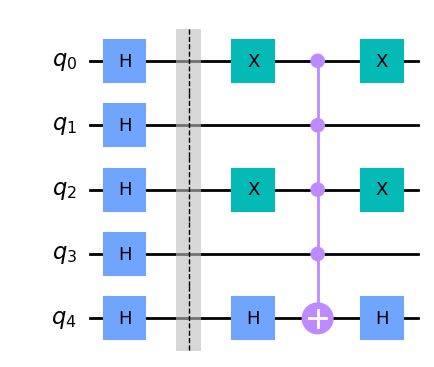

In [47]:
def oracle(circuit: QuantumCircuit) -> None:
    """Grover's oracle for |11010>"""
    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    
    circuit.x([0,2])
    circuit.compose(cnz(5), inplace=True)
    circuit.x([0,2])

    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
state_preparation(qc)
qc.barrier()
oracle(qc)
answer2 = qc
qc.draw('mpl', cregbundle=False)

In [48]:
# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge7b

grade_challenge7b(answer2)


Congratulations 🎉! Your answer is correct.


## Part 3: Creating the Diffuser operator

Diffusion operator는 현재 양자 상태를 $|s\rangle$에 대해 대칭 이동 시켜주는 연산을 의미합니다. 방금 말씀드린 문장이 잘 이해가 안 되실 수 있습니다. 일단은 이해가 안 되더라도 넘어가 주시길 바랍니다. Part 4에서 $|s\rangle$에 대한 대칭 이라는 것이 무슨 의미였는지 그림을 통해 설명드리겠습니다.

$|s\rangle$에 대한 대칭이동을 시켜주는 operator $U_{s}$는 다음과 같이 쓸 수 있습니다.

$$
\begin{aligned}
U_{s} &= 2|s\rangle\langle s| - I\\
&= H^{\otimes n}(2|0\rangle^{\otimes n}\langle0|^{\otimes n} - I)H^{\otimes n}\\
&= H^{\otimes n}X^{\otimes n}(2|1\rangle^{\otimes n}\langle1|^{\otimes n} - I)X^{\otimes n}H^{\otimes n}
\end{aligned}
$$

### 문제 3

함수 `diffusion_op`는 위의 $U_{s}$ 연산을 양자 회로에 가하는 것입니다. 위 공식의 마지막 줄에 집중해주세요. 가장 오른쪽에 있는 $H^{\otimes n}$가 양자 회로에 가장 먼저 나타나야 합니다. 두번째로는 $X^{\otimes n}$를 가해야 하며, 그 다음에는 $2|1\rangle^{\otimes n}\langle1|^{\otimes n} - I$를 가해야 하고, 그 다음에는 $X^{\otimes n}$와 $H^{\otimes n}$ 순서로 가해야 합니다.

참고로 $2|1\rangle^{\otimes n}\langle1|^{\otimes n} - I$는 qubits 모두 $|1\rangle$인 경우 위상을 뒤집어주는 `c5z`와 같은 의미입니다.

다음 셀에서 `diffusion_op` 함수 내부를 채워주시길 바랍니다. `diffusion_op`에서는 다음 과정들을 수행하도록 코딩하시면 됩니다.

1. 5개의 qubits에 전부 hadamard gate를 가합니다.
2. 5개의 qubits에 전부 $X$ gate를 가합니다.
3. 5개의 qubits에 `c5z`를 가합니다.
4. 5개의 qubits에 전부 $X$ gate를 가합니다.
5. 5개의 qubits에 전부 hadamard gate를 가합니다.

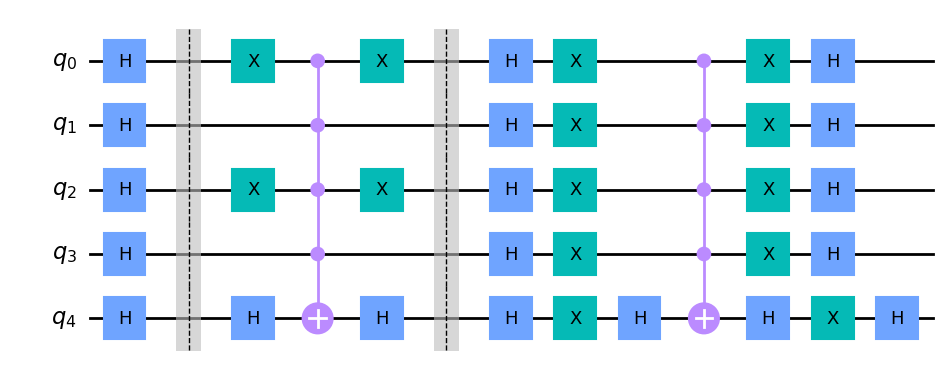

In [49]:
def diffusion_op(circuit: QuantumCircuit) -> None:
    """diffusion operator for 5qubits"""
    
    # Write your code below this line, making sure it's indented to where this comment begins from ## 

    circuit.h([0,1,2,3,4])
    circuit.x([0,1,2,3,4])
    circuit.compose(cnz(5), inplace=True)
    circuit.x([0,1,2,3,4])
    circuit.h([0,1,2,3,4])
    

    ## Do not change the code below this line ##
    
qc = base.copy_empty_like()
state_preparation(qc)
qc.barrier()
oracle(qc)
qc.barrier()
diffusion_op(qc)
answer3 = qc
qc.draw('mpl', cregbundle=False)

In [50]:
# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge7c

grade_challenge7c(answer3)


Congratulations 🎉! Your answer is correct.


## Part 4: Repeat oracle and diffusion operator

이제 데이터 셋의 크기가 $N=2^{5}=32$인 Grover's algorithm의 모든 구성요소들을 잘 구성하셨습니다. 아직 Grover's algorithm을 완성한 것은 아닙니다. Grover's algorithm은 state preparation을 한 뒤에 oracle과 diffusion operator 2개를 적절한 횟수로 반복해서 가해야 합니다. 그 2개를 왜 반복해서 가해야하는지, 그리고 얼마나 반복해서 가해야 하는지 지금부터 살펴보겠습니다.

### Step 1: State preparation
앞에서 모든 데이터들의 중첩 상태(computational basis 기반으로 가능한 모든 양자 상태들의 중첩 상태)를 $|s\rangle$이라 하기로 하였습니다. 그 중에는 우리가 찾고자 하는 데이터에 해당하는 양자상태인 $|\omega\rangle$도 포함되어 있을 것입니다. $|s\rangle$에 중첩되어 있는 상태들 중 $|\omega\rangle$를 제외한 나머지 상태들(답이 아닌 상태들)의 중첩 상태를 $|s^{'}\rangle$이라고 합시다. 이 때, state preparation 과정을 거치면 현재 상태는 $|s\rangle$이 됩니다.

![grover_step1](images/grover_step1.jpg)

위의 그림을 보십시오. **왼쪽 그림**은 현재 state preparation까지 했을 때의 양자 상태를 보라색으로 칠하였습니다. **오른쪽 그림**은 이 챌린지의 Part 1의 첫번째 그림과 같이 우리가 찾고자 하는 상태를 보라색으로 표현한 것입니다.

위의 그림에서 왜 $|s\rangle$가 $|\omega\rangle$보다 $|s^{'}\rangle$쪽으로 치우쳐저 있을까요? 그 이유는 $|s\rangle$를 computational basis로 측정하였을 때, 하나의 정답인 상태인 $|\omega\rangle$보다 N-1개의 정답이 아닌 상태인 $|s^{'}\rangle$ 중에 하나로 측정될 확률이 더 크기 때문입니다. 이를 정량적으로 보기 위해서 수식을 조금 보겠습니다.

$$
\begin{aligned}
&|s\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle\\\\
&|\omega\rangle\\\\
&|s^{'}\rangle = \frac{1}{\sqrt{N-1}}\sum_{x=0,\; x \neq \omega}^{N-1}|x\rangle\\\\
\end{aligned}
$$

따라서 다음과 같은 관계가 성립합니다.

$$ |s\rangle = \frac{1}{\sqrt{N}}|\omega\rangle + \frac{\sqrt{N-1}}{\sqrt{N}}|s^{'}\rangle $$

즉 $|s\rangle$에는 $|\omega\rangle$이 $1/\sqrt{N}$만큼 있다는 것입니다.
따라서 위 그림 왼쪽 그림에 있는 $\theta$는 다음의 수식을 만족합니다. 
$$\sin(\theta) = \frac{1}{\sqrt{N}}$$



### Step 2: Apply oracle

이제 Oracle $U_{\omega}$를 가하면 우리가 마킹한 $|\omega\rangle$만 위상이 뒤집히므로 다음 그림과 같이 됩니다.

![grover_step2](images/grover_step2.jpg)

### Step 3: Apply diffusion operator

Part 3에서 말하길, $U_{s}$는 현재 양자 상태를 $|s\rangle$에 대해 대칭 이동 시키는 것이라고 하였습니다. $U_{s}$를 가하면 어떻게 되는지 아래의 그림을 보시면 이해가 될 것입니다.

![grover_step3](images/grover_step3.jpg)

위 그림의 왼쪽 파트의 보라색으로 표현된 diffusion operator를 거친 양자 상태는 초기 양자 상태에 비해 $|\omega\rangle$과 가까워졌습니다. oracle과 diffusion operator를 번갈아 가면서 가할 때마다 $|\omega\rangle$와 이루는 각도가 $2\theta$만큼 작아집니다.

State preparation 이후 oracle과 diffusion operator를 $n$번 가한다고 합시다. 그럼 최종적인 양자 상태가 $|s^{'}\rangle$과 이루는 각도는 다음과 같이 됩니다.

$$(2n+1)\theta$$

이 각도가 90도(라디안으로 표현 하면 $\pi/2$)와 가장 가까울 때(최종적인 양자상태가 $|\omega\rangle$와 가장 가까울 때) oracle과 diffusion operator 반복하여 가하는 것을 멈추면 됩니다.
위의 **Step 1**에서 $\theta$가 $\sin(\theta) = \frac{1}{\sqrt{N}}$을 만족함을 보였습니다. 좀 더 간단하게 하기 위해서 우리가 가진 unstructured 데이터 셋의 크기인 $N$이 엄청나게 크다고 가정합시다(이런 경우에 사람이 하나 하나 확인하며 search를 하는 것보단 컴퓨터를 사용하여 search를 하는 것이 적절할 것입니다).

$N$이 큰 숫자라면 $\sin(\theta) = \frac{1}{\sqrt{N}}$이므로 $\sin(\theta)$는 0에 가까워질 것입니다. 이 경우에, 여러분이 고등학교 때 배운 $\sin(\theta) \simeq \theta$ 성질을 사용할 수 있습니다.

따라서, $N$이 클 경우 다음과 같이 표현할 수 있습니다.
$$\theta \simeq \frac{1}{\sqrt{N}}$$

따라서, State preparation 이후 oracle과 diffusion operator를 $n$번 가했을 때 최종적인 양자 상태가 $|s^{'}\rangle$과 이루는 각도를 다음과 같이 쓸 수 있습니다.

$$(2n+1)\theta \simeq \frac{2n+1}{\sqrt{N}}$$

그리고 이 값이 90도와 가장 가까워질때까지 oracle과 diffusion operator를 반복해야 하므로 $N$이 큰 수인 경우, 우리가 oracle과 diffusion operator를 반복해야하는 n의 횟수는 다음과 같이 쓸 수 있습니다.

$$\DeclareMathOperator*{\argmin}{arg\,min}\\
\argmin_{n}\Bigg|\frac{2n+1}{\sqrt{N}} - \frac{\pi}{2}\Bigg|$$

그러면 연산의 반복 횟수 $n$이 $\sqrt{N}$에 비례한다는 것을 알 수 있습니다.

**즉, Grover's algorithm의 시간 복잡도는 $O(\sqrt{N})$입니다.**

### 문제 4

다음 코드 셀에 있는 함수 `grover(n)`은 oracle과 diffusion을 n번 반복하는 Grover's algorithm 양자 회로를 반환하는 함수입니다.

다다음 코드 셀에서는 이 `grover(n)`에서 반환한 회로를 측정한 결과를 `plot_histogram()`함수를 통해 히스토그램으로 보여주는 것입니다. 다다음 코드 셀에서 `n`의 값을 바꿔보며 가장 $|11010\rangle$이 나올 확률이 높은 반복 횟수를 찾으시길 바랍니다. 그 횟수를 다다다음 코드 셀의 `answer4`에 대입해주세요!

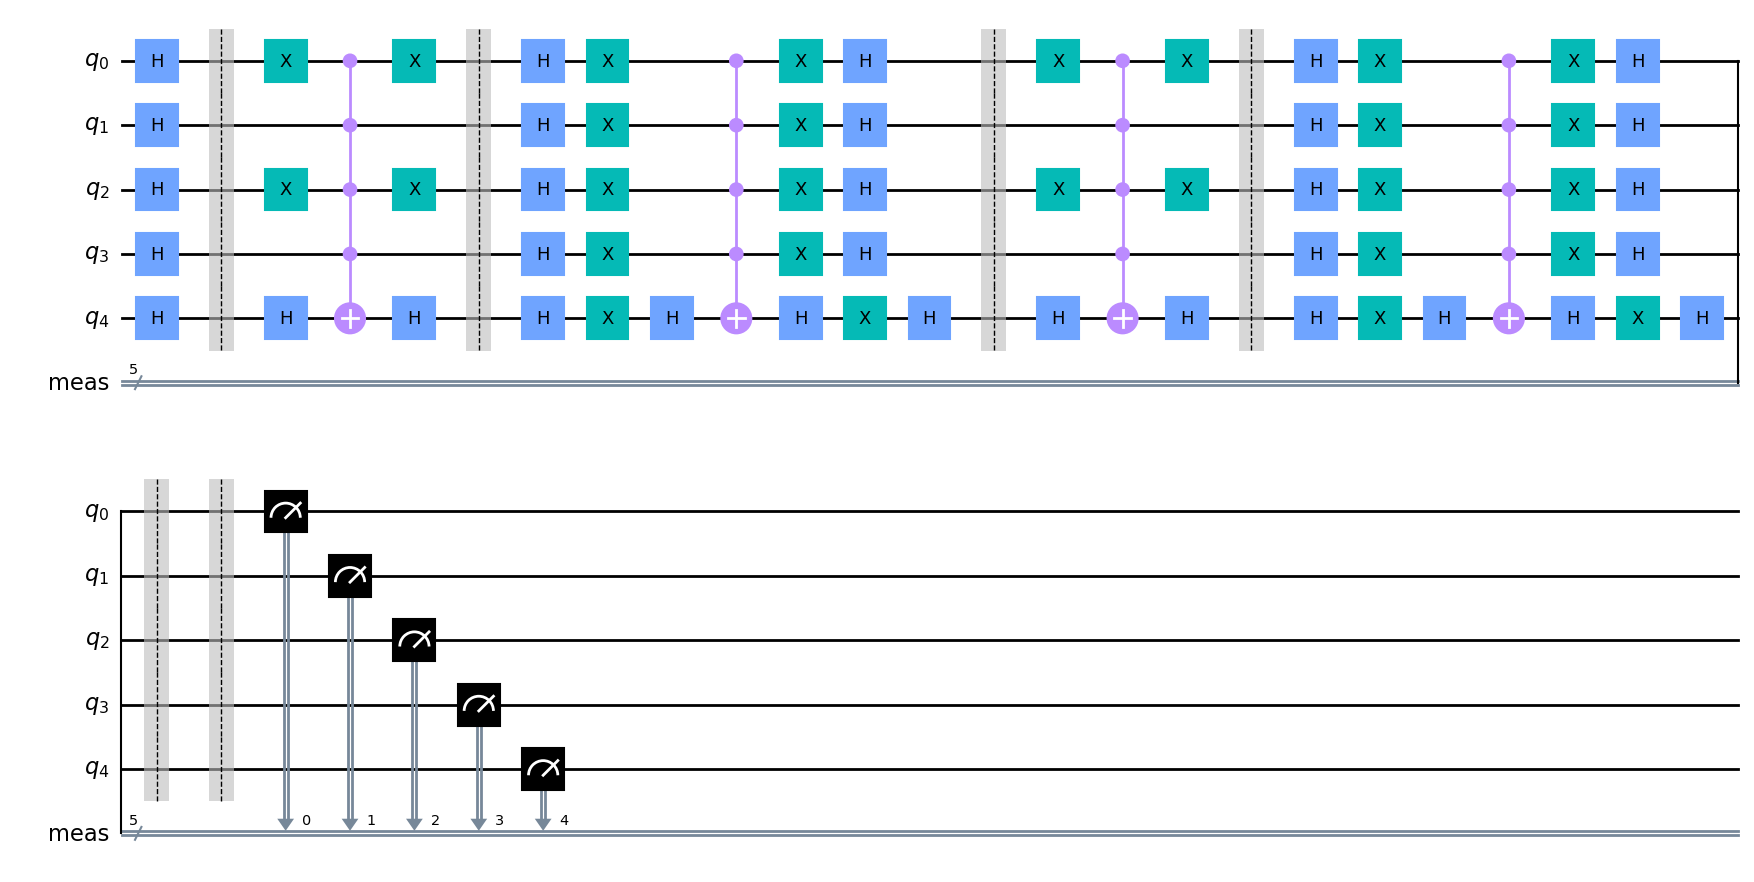

In [34]:
def grover(n: int) -> QuantumCircuit:
    """Grover's algorithm that repeat oracle and diffusion operator n times"""
    
    qc = base.copy_empty_like()
    state_preparation(qc)
    qc.barrier()
    
    for i in range(n):
        oracle(qc)
        qc.barrier()
        diffusion_op(qc)
        qc.barrier()
    
    qc.measure_all()
    return qc

# example picture: repeat 2 times
circuit = grover(2)
circuit.draw("mpl")

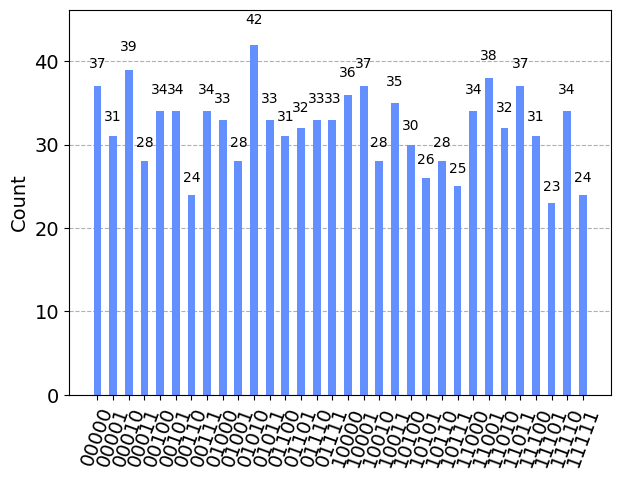

In [35]:
n = 0 # Change this number

sim = AerSimulator()
job = sim.run(grover(n), shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [40]:
answer4 = 4# Write the appropriate number of iterations

In [41]:
# Grader Cell: Run this to submit your answer

from qff_ku_grader.challenges.qff_ku2023 import grade_challenge7d

grade_challenge7d(answer4)


Congratulations 🎉! Your answer is correct.


## 축하합니다!

여러분은 드디어 Quantum Algorithm이라는 영역에 발을 내딛으셨습니다! 양자 컴퓨터는 unstructured search problem 말고도 빠르게 풀어낼 수 있는 다른 문제들이 더 있습니다!

더 많은 것을 알고 싶으신 분들은 Qiskit Textbook의 [Quantum Protocols and quantum algorithms](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits) 링크를 보시기 바랍니다!!

이 챌린지 문제까지 완주하셨다니 정말 기쁩니다. 아직 챌린지 시간이 남았다면 뒤에 챌린지도 재밌게 즐겨주시길 바랍니다!! 감사합니다:)